# Предварительная обработка и масштабирование

Для некоторых алгоритмов машинного обучения требуется масштабировать данные.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

canser_info = load_breast_cancer()
canser_data = pd.DataFrame(canser_info.data, columns=canser_info.feature_names)
canser_target = canser_info.target

X_train, X_test, y_train, y_test = train_test_split(canser_data,canser_target, random_state=13)

In [2]:
canser_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# без масштабирования признаков
from sklearn.svm import SVC
svc = SVC().fit(X_train,y_train)
print(f'Правильность на тренировочных данных: {svc.score(X_train,y_train):.3f}')
print(f'Правильность на тестовых данных: {svc.score(X_test,y_test):.3f}')

Правильность на тренировочных данных: 0.930
Правильность на тестовых данных: 0.888


In [4]:
# MinMaxScaler - сдвигает данные в диапазон от 0 до 1
from sklearn.preprocessing import MinMaxScaler
# создаём экземпляр 
scaler = MinMaxScaler()
# обучаем (подгоняем) scaler к данным
scaler.fit(X_train)
# фактически преобразуем данные (transform - модель возвращает новое представление данных)
pd.DataFrame(scaler.transform(X_train),columns=canser_info.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.221313,0.148123,0.219519,0.125118,0.256838,0.180510,0.160239,0.125944,0.295960,0.239246,...,0.162707,0.193763,0.168573,0.075997,0.151044,0.203950,0.262906,0.314847,0.219200,0.217762
1,0.100446,0.318228,0.099659,0.051189,0.495351,0.196154,0.020933,0.097763,0.746465,0.424666,...,0.092537,0.297175,0.087947,0.039028,0.414220,0.098546,0.017821,0.158078,0.321506,0.164305
2,0.140996,0.291173,0.134443,0.073157,0.259908,0.077419,0.046696,0.055219,0.662626,0.157449,...,0.082669,0.300906,0.075543,0.035406,0.118076,0.030381,0.034068,0.076542,0.223536,0.080808
3,0.211029,0.626310,0.205221,0.116751,0.286540,0.138396,0.095009,0.096670,0.280303,0.228650,...,0.161246,0.689232,0.155457,0.074459,0.279802,0.147781,0.154786,0.245126,0.173862,0.176440
4,0.000000,0.531958,0.002988,0.000000,0.307394,0.308325,0.216776,0.067793,0.493434,0.577665,...,0.000000,0.529584,0.000000,0.000000,0.554298,0.265786,0.290000,0.172236,0.241474,0.338187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.169401,0.113967,0.163252,0.090749,0.405435,0.097387,0.046439,0.088767,0.388889,0.228862,...,0.121044,0.114072,0.110620,0.053890,0.373895,0.054109,0.060821,0.189666,0.255076,0.083169
422,0.306038,0.117010,0.301536,0.181842,0.651530,0.239771,0.236645,0.328777,0.462626,0.303454,...,0.217162,0.089552,0.203498,0.106615,0.411390,0.099719,0.133248,0.349638,0.117288,0.114719
423,0.226211,0.230301,0.222436,0.128937,0.352893,0.150021,0.079007,0.112922,0.333333,0.188387,...,0.198523,0.298241,0.179045,0.096144,0.257163,0.146511,0.145556,0.298312,0.207569,0.138069
424,0.108379,0.282381,0.118651,0.056638,0.400469,0.337464,0.306232,0.184692,0.307576,0.655012,...,0.094364,0.329691,0.094454,0.041336,0.345596,0.254650,0.297949,0.341371,0.206781,0.401154


In [5]:
# StandardScaler - среднее = 0, дисперсия = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
pd.DataFrame(scaler.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.550245,-1.221134,-0.549358,-0.550055,-1.099062,-0.503230,-0.268851,-0.616139,-0.616880,-0.163556,...,-0.657541,-1.068672,-0.595579,-0.621366,-1.319077,-0.079099,0.166179,-0.364313,-0.370633,0.248796
1,-1.237029,-0.077076,-1.229892,-1.024506,0.794980,-0.407133,-1.010506,-0.759993,2.601925,1.090902,...,-1.048288,-0.443778,-1.062158,-0.877106,0.332689,-0.766894,-1.233542,-1.050832,0.463630,-0.201903
2,-1.006617,-0.259033,-1.032396,-0.883520,-1.074688,-1.136529,-0.873342,-0.977170,2.002910,-0.716951,...,-1.103236,-0.421231,-1.133939,-0.902165,-1.525992,-1.211698,-1.140748,-1.407894,-0.335269,-0.905878
3,-0.608683,1.994967,-0.630538,-0.603751,-0.863203,-0.761938,-0.616128,-0.765575,-0.728744,-0.235239,...,-0.665681,1.925341,-0.671479,-0.632008,-0.510955,-0.445626,-0.451309,-0.669633,-0.740345,-0.099597
4,-1.807772,1.360390,-1.778761,-1.353014,-0.697600,0.281941,0.032147,-0.912981,0.794054,2.126010,...,-1.563585,0.960621,-1.571099,-1.147090,1.211855,0.324398,0.320917,-0.988832,-0.188992,1.264114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-0.845217,-1.450856,-0.868825,-0.770621,0.080950,-1.013864,-0.874714,-0.805915,0.047089,-0.233805,...,-0.889547,-1.550226,-0.930951,-0.774295,0.079596,-1.056864,-0.987962,-0.912502,-0.078078,-0.885970
422,-0.068828,-1.430386,-0.083688,-0.186026,2.035212,-0.139191,0.137926,0.419259,0.573934,0.270845,...,-0.354305,-1.698397,-0.393474,-0.409566,0.314928,-0.759245,-0.574319,-0.211954,-1.201681,-0.619974
423,-0.522417,-0.668438,-0.532799,-0.525548,-0.336284,-0.690525,-0.701325,-0.682611,-0.349849,-0.507636,...,-0.458097,-0.437336,-0.534977,-0.481997,-0.653042,-0.453912,-0.504027,-0.436721,-0.465472,-0.423105
424,-1.191948,-0.318170,-1.122056,-0.989535,0.041521,0.460945,0.508405,-0.316251,-0.533884,2.649298,...,-1.038112,-0.247291,-1.024502,-0.861143,-0.098013,0.251730,0.366313,-0.248158,-0.471902,1.794998


In [6]:
# RobustScaler - аналог StandardScaler, но вместо среднего - медиана, вместо дисперсии - квартили (игнорирует выбросы)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.294190,-0.854860,-0.261741,-0.269133,-0.802027,-0.245619,0.063321,-0.137275,-0.461883,0.012522,...,-0.310533,-0.697934,-0.243675,-0.269653,-0.990493,0.150607,0.286407,-0.084675,-0.232887,0.426056
1,-0.904326,0.038171,-0.849002,-0.757511,0.570798,-0.166362,-0.514989,-0.235738,2.204783,1.056052,...,-0.632816,-0.264657,-0.617798,-0.524430,0.295592,-0.451262,-0.783655,-0.541259,0.539435,0.024628
2,-0.699629,-0.103862,-0.678575,-0.612387,-0.784360,-0.767940,-0.408034,-0.384388,1.708520,-0.447823,...,-0.678137,-0.249023,-0.675355,-0.549395,-1.151599,-0.840496,-0.712716,-0.778731,-0.200149,-0.602389
3,-0.346106,1.655570,-0.331794,-0.324405,-0.631073,-0.458992,-0.207470,-0.239559,-0.554559,-0.047108,...,-0.317247,1.378001,-0.304535,-0.280255,-0.361279,-0.170130,-0.185652,-0.287735,-0.575149,0.115749
4,-1.411372,1.160231,-1.322645,-1.095663,-0.511042,0.401958,0.298025,-0.340453,0.707025,1.917114,...,-1.057826,0.709101,-1.025889,-0.793400,0.980121,0.503695,0.404702,-0.500025,-0.064732,1.330378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-0.556242,-1.034177,-0.537423,-0.496173,0.053261,-0.666770,-0.409104,-0.267170,0.088191,-0.045915,...,-0.501888,-1.031826,-0.512591,-0.422007,0.098531,-0.705006,-0.595914,-0.449260,0.037946,-0.584657
422,0.133498,-1.018198,0.140106,0.105584,1.469732,0.054625,0.380508,0.571416,0.524664,0.373882,...,-0.060428,-1.134562,-0.081618,-0.058650,0.281763,-0.444568,-0.279690,0.016654,-1.002232,-0.347740
423,-0.269468,-0.423435,-0.247451,-0.243906,-0.249156,-0.400093,-0.273903,-0.182773,-0.240658,-0.273703,...,-0.146034,-0.260190,-0.195082,-0.130808,-0.471910,-0.177381,-0.225954,-0.132832,-0.320685,-0.172393
424,-0.864277,-0.150022,-0.755947,-0.721514,0.024682,0.549594,0.669390,0.067986,-0.393124,2.352415,...,-0.624423,-0.128420,-0.587604,-0.508528,-0.039758,0.440106,0.439407,-0.007424,-0.326637,1.803226


In [7]:
# Normalizer масштабирует точки, чтобы вектор признаков имел евклидову длину 1 (когда важно направление, а не длина)
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
pd.DataFrame(scaler.fit_transform(X_train))  # более предпочтительный вариант 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.017107,0.019741,0.110377,0.647296,0.000114,0.000110,0.000096,0.000036,0.000231,0.000086,...,0.018396,0.027027,0.122804,0.742429,0.000144,0.000341,0.000431,0.000128,0.000375,0.000124
1,0.019843,0.038944,0.126141,0.590068,0.000219,0.000170,0.000018,0.000040,0.000517,0.000143,...,0.022833,0.047193,0.146224,0.775826,0.000285,0.000275,0.000042,0.000093,0.000651,0.000163
2,0.020692,0.035863,0.130805,0.667337,0.000159,0.000087,0.000039,0.000022,0.000464,0.000113,...,0.021416,0.045631,0.135758,0.717060,0.000192,0.000128,0.000078,0.000043,0.000528,0.000132
3,0.017214,0.040497,0.110128,0.634776,0.000121,0.000093,0.000058,0.000028,0.000232,0.000088,...,0.018778,0.054340,0.122035,0.751259,0.000173,0.000266,0.000260,0.000102,0.000351,0.000118
4,0.026184,0.086609,0.164570,0.580116,0.000295,0.000408,0.000315,0.000046,0.000693,0.000264,...,0.029544,0.108567,0.185508,0.761231,0.000543,0.001043,0.001155,0.000170,0.000950,0.000363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.018795,0.022048,0.119462,0.643751,0.000164,0.000086,0.000033,0.000030,0.000308,0.000103,...,0.020211,0.027476,0.128531,0.743036,0.000226,0.000151,0.000120,0.000093,0.000482,0.000114
422,0.015587,0.014726,0.100982,0.664415,0.000140,0.000109,0.000113,0.000074,0.000221,0.000072,...,0.016348,0.017197,0.105689,0.730499,0.000156,0.000153,0.000174,0.000113,0.000242,0.000081
423,0.015748,0.021133,0.101304,0.602401,0.000117,0.000087,0.000043,0.000029,0.000220,0.000076,...,0.018050,0.029692,0.114762,0.781753,0.000150,0.000236,0.000218,0.000111,0.000335,0.000097
424,0.019608,0.035755,0.127894,0.598688,0.000192,0.000256,0.000259,0.000074,0.000330,0.000161,...,0.022292,0.048287,0.144663,0.772513,0.000258,0.000584,0.000690,0.000196,0.000518,0.000230


Чтобы применить SVM к масштабированным данным, мы должны преобразовать еще **тестовый набор**. Это снова делается с помощью вызова метода transform, на этот раз для X_test

In [8]:
pd.DataFrame(scaler.transform(X_test))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.014459,0.017661,0.094888,0.603899,0.000107,0.000158,0.000103,0.000058,0.000220,0.000072,...,0.016430,0.028093,0.108908,0.782492,0.000152,0.000456,0.000484,0.000173,0.000379,0.000110
1,0.016190,0.016769,0.104264,0.635506,0.000143,0.000111,0.000048,0.000043,0.000194,0.000082,...,0.017675,0.026538,0.116828,0.754726,0.000195,0.000281,0.000225,0.000145,0.000300,0.000108
2,0.018406,0.035310,0.117014,0.627206,0.000168,0.000099,0.000015,0.000018,0.000266,0.000101,...,0.020385,0.047696,0.130719,0.755352,0.000211,0.000183,0.000059,0.000071,0.000491,0.000117
3,0.014272,0.023634,0.092565,0.575960,0.000105,0.000113,0.000089,0.000057,0.000189,0.000067,...,0.017588,0.032390,0.114325,0.802659,0.000163,0.000423,0.000404,0.000174,0.000400,0.000104
4,0.018423,0.030607,0.116936,0.641634,0.000141,0.000081,0.000039,0.000035,0.000326,0.000096,...,0.020027,0.042354,0.128473,0.744198,0.000181,0.000157,0.000122,0.000101,0.000529,0.000113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.013613,0.022036,0.089598,0.582194,0.000119,0.000125,0.000137,0.000065,0.000181,0.000068,...,0.016203,0.033623,0.110329,0.797711,0.000172,0.000309,0.000377,0.000165,0.000304,0.000092
139,0.010077,0.008370,0.066319,0.607533,0.000046,0.000062,0.000063,0.000051,0.000091,0.000027,...,0.011568,0.009352,0.076979,0.785015,0.000059,0.000106,0.000119,0.000093,0.000128,0.000033
140,0.017759,0.034479,0.112583,0.524332,0.000190,0.000112,0.000051,0.000026,0.000283,0.000131,...,0.022622,0.047088,0.142639,0.827337,0.000251,0.000197,0.000215,0.000095,0.000462,0.000153
141,0.016538,0.016861,0.104948,0.656879,0.000113,0.000049,0.000012,0.000017,0.000189,0.000079,...,0.017597,0.020850,0.111933,0.736794,0.000150,0.000070,0.000036,0.000052,0.000230,0.000094


#### Чтобы модель контролируемого обучения АДЕКВАТНО работала на тестовом наборе, важно преобразовать обучающий и тестовый наборы ОДИНАКОВЫМ ОБРАЗОМ! (с одним и тем же scaler'ом)

In [9]:
scaler_min_max = MinMaxScaler()
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()
scaler_normalizer = Normalizer()
scalers = [scaler_min_max, scaler_standard,scaler_robust,scaler_normalizer]

svc = SVC()
svc.fit(X_train, y_train)
print('Без масштабирования:')
print(f'Правильность на тренировочных данных: {svc.score(X_train,y_train):.3f}')
print(f'Правильность на тестовых данных: {svc.score(X_test,y_test):.3f}\n')
for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)  # неявно обучили scaler
    X_test_scaled = scaler.transform(X_test)  # используем ЕГО ЖЕ и для тестового набора
    svc.fit(X_train_scaled, y_train)
    print(str(scaler)[:-2])
    print(f'Правильность на тренировочных данных: {svc.score(X_train_scaled,y_train):.3f}')
    print(f'Правильность на тестовых данных: {svc.score(X_test_scaled,y_test):.3f}\n')

Без масштабирования:
Правильность на тренировочных данных: 0.930
Правильность на тестовых данных: 0.888

MinMaxScaler
Правильность на тренировочных данных: 0.984
Правильность на тестовых данных: 0.986

StandardScaler
Правильность на тренировочных данных: 0.986
Правильность на тестовых данных: 0.965

RobustScaler
Правильность на тренировочных данных: 0.986
Правильность на тестовых данных: 0.972

Normalizer
Правильность на тренировочных данных: 0.908
Правильность на тестовых данных: 0.895



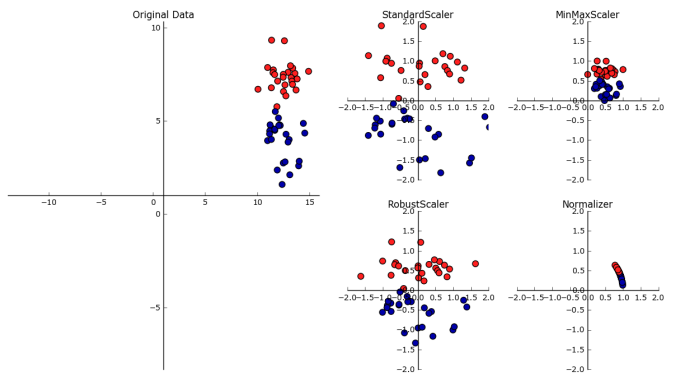